In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
df = pd.read_csv('~/nvsmi.csv')
print(df.columns)

Index(['timestamp', 'name', 'index', 'sm', 'mem '], dtype='object')


In [3]:
#nvidia-smi --query-gpu=timestamp,gpu_name,index,utilization.gpu,utilization.memory -lms 1000 --format=csv 1> pbrun-nvsmi    .csv &
#vmstat -tn 1 2>&1 > pbrun-vmstat.txt &

t = []
sm = []
mm = []
i = 0
gpus = [0,1,2,3,4,5,6,7]

for row in df.values:
    if row[2] == 0:
        i = i + 1
    if row[2] in gpus:
        if i < 4000:
            t.append(i)
            sm.append(int(row[3].split()[0]))
            mm.append(int(row[4].split()[0])) 
    
    #df.iloc(i).sm = int(df.iloc(i).sm.split('')[0])
    #df.iloc(i).mem = int(df.iloc(i).mem.split('')[0])


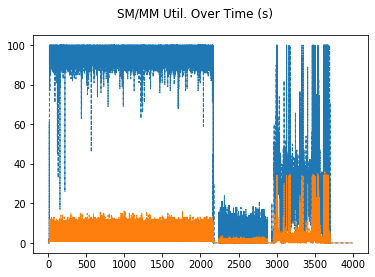

In [4]:
fig = plt.figure()
fig.suptitle('SM/MM Util. Over Time (s)')
plt.plot(t, sm, '--', linewidth=1, markersize=2, )
plt.plot(t, mm, '--', linewidth=1, markersize=2, )
plt.show()
fig.savefig('pbrun-sm.svg', width=1024, height=768)
fig.savefig('pbrun-sm.pdf', width=1024, height=768)